# Multiple Linear Regression


##### Giovanni Paz-Silva

#### Fuel Consumption Analysis Review

#### Objectives

*   Use Scikit-learn to Implement multiple linear regression
*   Create, train, and test a multiple linear regression model using Fuel Consumption Dataset
*   Explain every step with clarity and educationally

#### Import needed packages

##### For this lab, we will need to have the following packages

* NumPy
* Matplotlib
* Pandas
* Scikit-learn

In [2]:
import pandas as pd
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

print("Libraries Installed")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Libraries Installed


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split

print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)


Numpy Version:  2.0.2
Pandas Version:  2.2.3


### Data Loaded

##### The url of the dataset used in this lab is provided by the IBM Data Science Course

In [24]:
fuel_consumption_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [25]:
df = pd.read_csv(fuel_consumption_url)
# Exploration of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [26]:
df.sample(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
945,2014,SUBARU,FORESTER AWD,SUV - SMALL,2.5,4,AV,X,9.6,7.4,8.6,33,198
339,2014,FIAT,500 HATCHBACK TURBO,MINICOMPACT,1.4,4,M5,X,8.5,6.9,7.8,36,179
647,2014,LAND ROVER,RANGE ROVER SPORT V8 5.0 SC FFV,SUV - STANDARD,5.0,8,AS8,Z,16.6,12.3,14.7,19,338
86,2014,BMW,335i,COMPACT,3.0,6,A8,Z,11.4,7.3,9.6,29,221
566,2014,JAGUAR,XKR COUPE,MINICOMPACT,5.0,8,AS6,Z,15.6,10.9,13.5,21,310
65,2014,AUDI,TT ROADSTER QUATTRO,TWO-SEATER,2.0,4,A6,Z,10.4,7.6,9.1,31,209
408,2014,FORD,FOCUS SFE FFV,COMPACT,2.0,4,A6,E,11.6,8.3,10.1,28,162
544,2014,INFINITI,QX70 AWD,SUV - SMALL,3.7,6,AS7,Z,14.5,10.7,12.8,22,294
179,2014,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,Z,17.0,11.8,14.7,19,338
103,2014,BMW,550i xDRIVE,MID-SIZE,4.4,8,A8,Z,14.4,9.6,12.2,23,281


In [27]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


##### The first section of the model is created to review the IBM DS course lab work of predicting the CO2 emissions by excluding some features. In the second section I will include the remaining features to improve the accuracy of the model.

### Data Cleanning
##### Since All the models are from the same year, and the features "MAKE","MODEL", "VEHICLECLASS", "TRANSMISSION", and "FUELTYPE" are not numerical values, the first part will consist on s model analysis just with the features with numerical values.

In [29]:
# Dropping the non-numerical features and Year
df = df.drop(columns=["MAKE", "MODEL", "VEHICLECLASS", "TRANSMISSION", "FUELTYPE","MODELYEAR"])
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


##### Now that we have the dataset with only numerical values, we can take a look at the relationship between the features and the target variable, which is "CO2EMISSIONS". We can use a scatter plot to visualize this relationship.

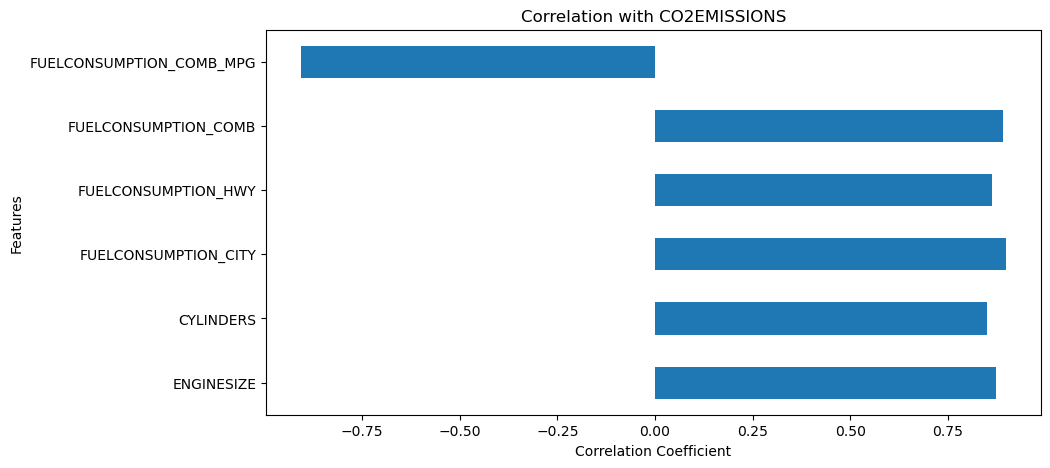

In [9]:
correlation_values = df.corr()["CO2EMISSIONS"].drop("CO2EMISSIONS")
correlation_values.plot(kind="barh", figsize=(10, 5), title="Correlation with CO2EMISSIONS")
plt.ylabel("Features")
plt.xlabel("Correlation Coefficient")
plt.show()

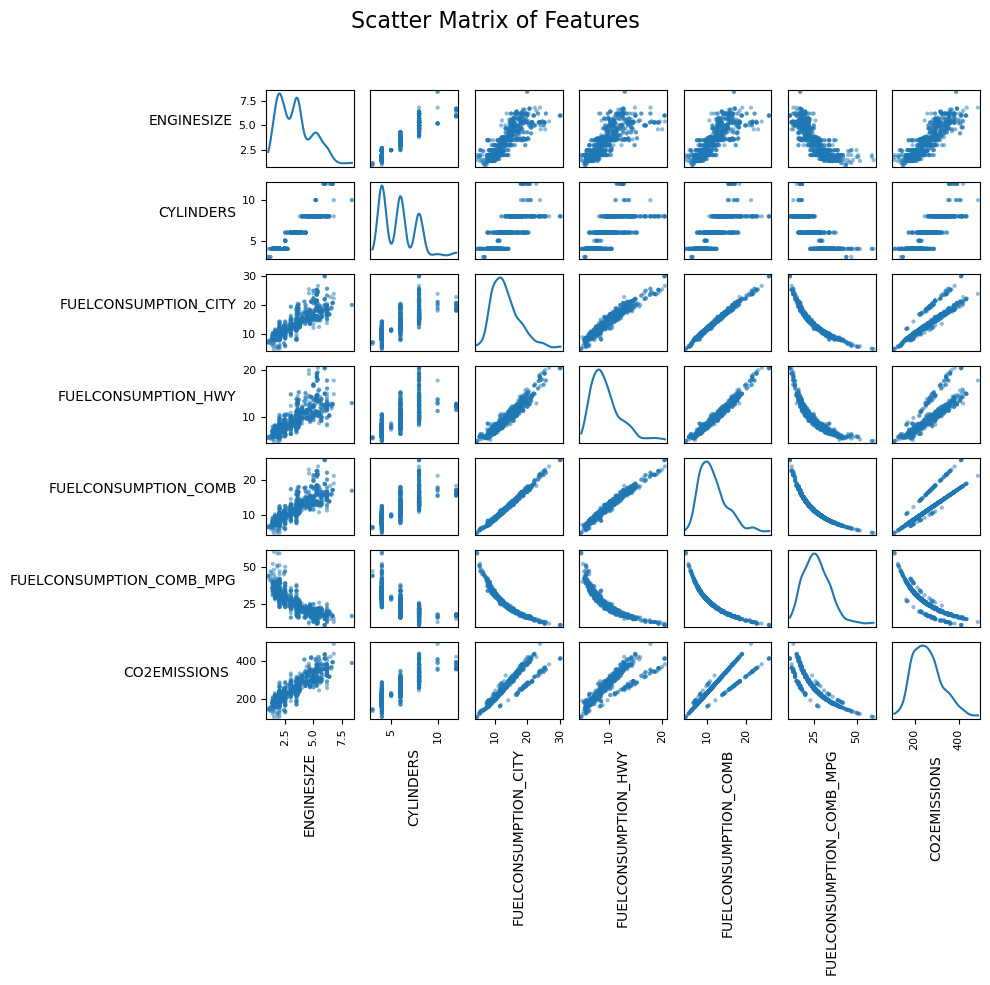

In [13]:
axes = pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal='kde', alpha=0.5)
plt.suptitle("Scatter Matrix of Features", fontsize=16)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.yaxis.label.set_position((0, 0.5))
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to make room for the title
plt.show()

#### Extracting the Features and Target Variable
##### Now that we have a better understanding of the dataset, we can extract the features and target variable. The target variable is "CO2EMISSIONS", and the features are the remaining columns

In [17]:
x = df.loc[:, df.columns != "CO2EMISSIONS"].to_numpy() # Features
y = df["CO2EMISSIONS"].to_numpy()  # Target Variable

#### Preprocessing selected features
##### We will use the StandardScaler to normalize the features. This is important because it helps the model to converge faster and perform better.

In [20]:
std_caler = preprocessing.StandardScaler()
X_std = std_caler.fit_transform(x)

In [21]:
pd.DataFrame(X_std).describe().round(2)  # Displaying the statistics of the standardized features

,0,1,2,3,4,5
count,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.66,-1.56,-2.12,-1.64,-1.98,-2.07
25%,-0.95,-1.00,-0.74,-0.71,-0.74,-0.73
50%,0.04,0.11,-0.17,-0.24,-0.20,-0.06
75%,0.67,1.23,0.55,0.49,0.51,0.61
max,3.57,3.45,4.12,3.95,4.08,4.50


#### Creating the Train and Test Sets
##### We will split the dataset into a training set and a test set. The training set will be used to train the model, and the test set will be used to evaluate the model's performance

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

#### Creating the Multiple Linear Regression Model
##### We will create a multiple linear regression model using Scikit-learn's LinearRegression class.

In [31]:
regressor = linear_model.LinearRegression()

# Training the model
regressor.fit(X_train, y_train)

#Print the coefficients
coef_ = regressor.coef_
intercept_ = regressor.intercept_
print("Coefficients:", coef_)
print("Intercept:", intercept_)

Coefficients: [ 12.68210265  13.0078442  -53.29772537 -15.28482881  76.18368459
 -30.11805916]
Intercept: 256.3539053918813


#### Evaluating the Model


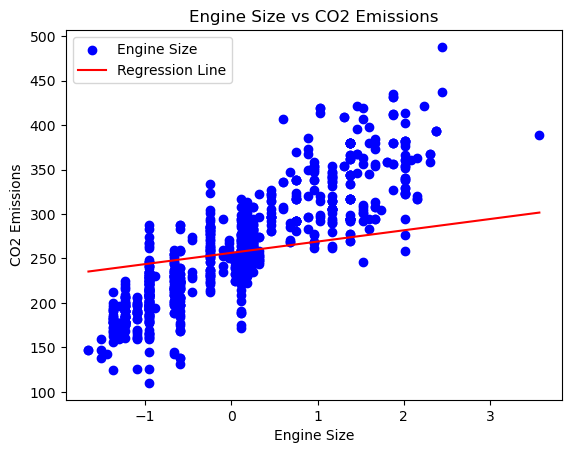

In [35]:
# Plotting each feature against the target variable
plt.scatter(X_train[:, 0], y_train, color='blue', label='Engine Size')
# Regression Line
x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_vals = coef_[0] * x_vals + intercept_
plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Engine Size vs CO2 Emissions')
plt.legend()
plt.show()